In [21]:
from google.colab import files

uploaded = files.upload()


Saving boston_housing_data.csv to boston_housing_data (1).csv


In [22]:
import pandas as pd

data_path = 'boston_housing_data.csv'
data = pd.read_csv(data_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Index     2000 non-null   int64  
 1   House_No  2000 non-null   object 
 2   Location  2000 non-null   object 
 3   CRIM      2000 non-null   float64
 4   ZN        2000 non-null   float64
 5   INDUS     2000 non-null   float64
 6   CHAS      2000 non-null   int64  
 7   NOX       2000 non-null   float64
 8   RM        2000 non-null   float64
 9   AGE       2000 non-null   float64
 10  DIS       2000 non-null   float64
 11  RAD       2000 non-null   int64  
 12  TAX       2000 non-null   float64
 13  PTRATIO   2000 non-null   float64
 14  B         2000 non-null   float64
 15  LSTAT     2000 non-null   float64
 16  MEDV      2000 non-null   float64
dtypes: float64(12), int64(3), object(2)
memory usage: 265.8+ KB
None
             Index         CRIM           ZN        INDUS         CHAS  \
count  2

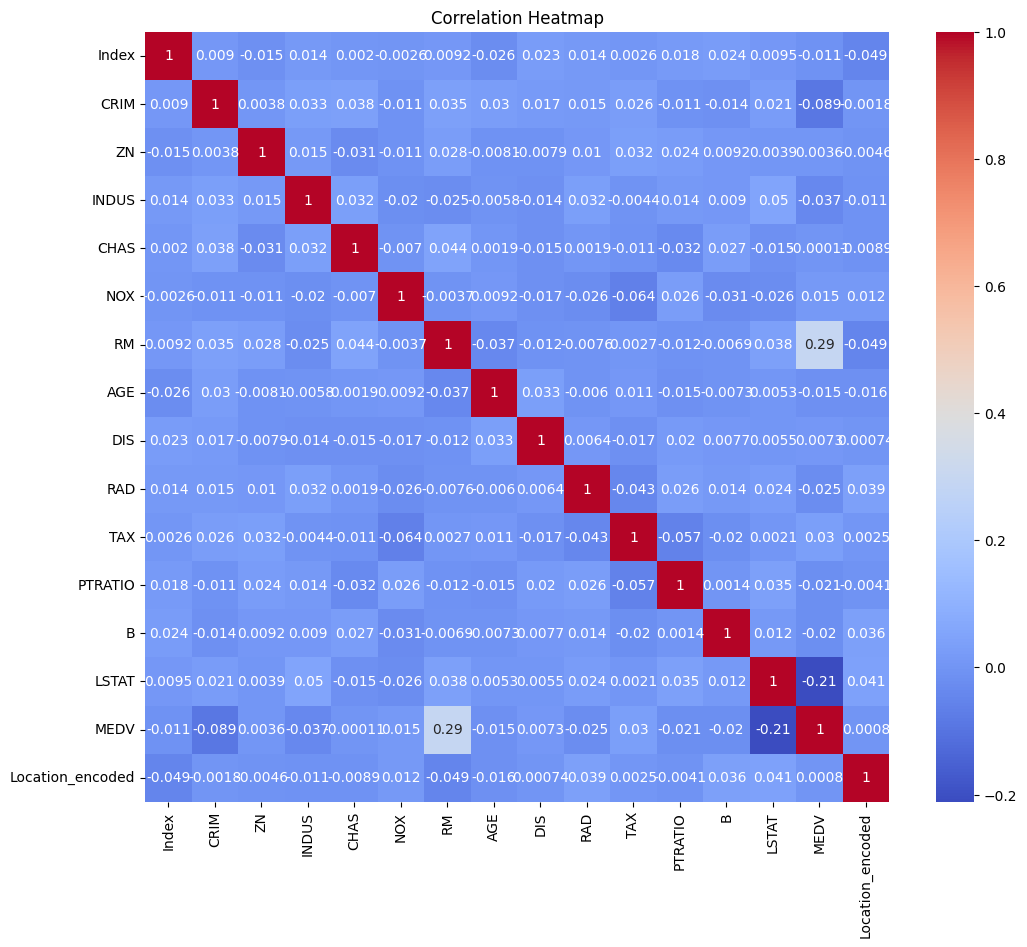

Linear Regression MSE: 2396175418.583902
Linear Regression R2: 0.1017125476599191
Ridge Regression MSE: 2396076291.9730864
Ridge Regression R2: 0.101749708624846

Visualization of Predictions vs Actual Prices




<ipython-input-23-f581865f3e5d>:74: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='black')


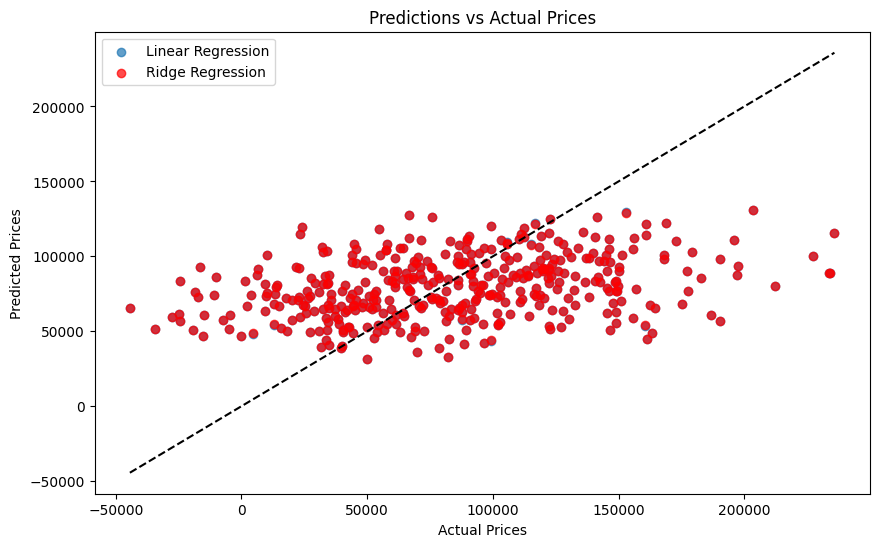



CONCLUSION:

Ridge Regression performs better.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score


print(data.info())
print(data.describe())

if data.isnull().sum().any():
    data = data.fillna(data.mean())
numeric_data = data.select_dtypes(include=[np.number])
data['Location_encoded'] = data['Location'].astype('category').cat.codes

numeric_data = data.select_dtypes(include=[np.number])
print("\nDATA VISUALIZATION:\n")

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

X = data.drop(columns=['House_No', 'Location', 'MEDV'])
y = data['MEDV']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression R2: {lr_r2}")

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Ridge Regression R2: {ridge_r2}")

print("\nVisualization of Predictions vs Actual Prices\n\n")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, label='Linear Regression', alpha=0.7)
plt.scatter(y_test, ridge_predictions, label='Ridge Regression', alpha=0.7, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='black')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predictions vs Actual Prices')
plt.legend()
plt.show()

print("\n\nCONCLUSION:\n")
if lr_r2 > ridge_r2:
    print("Linear Regression performs better.")
else:
    print("Ridge Regression performs better.")